In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np

# Generate a sample of size 25 from an exponential distribution
sample = np.random.exponential(scale=1, size=25)

print(sample)

[8.90653821e-01 2.36852624e-01 5.35546172e+00 1.90762113e+00
 1.21664033e-01 1.20129566e+00 4.95826099e-01 1.07897074e+00
 3.02182314e-02 3.32767939e+00 1.25326893e+00 3.56293355e-02
 1.50836726e-01 2.18129128e-01 1.51321478e-02 9.45306273e-01
 4.81847250e-01 1.23472009e+00 7.59532634e-01 4.33029270e-01
 8.60348128e-01 1.71708780e+00 9.46620195e-04 3.07242964e-01
 1.70928623e+00]


In [3]:
from scipy import stats

mode = stats.mode(sample)[0][0]

# Calculating median
median = np.median(sample)

# Calculating span (range)
span = np.max(sample) - np.min(sample)

# Calculating skewness
skewness = stats.skew(sample)

print(f"Mode: {mode}")
print(f"Median: {median}")
print(f"Span: {span}")
print(f"Skewness: {skewness}")

Mode: 0.0009466201946799694
Median: 0.7595326340442972
Span: 5.35451509635845
Skewness: 2.2597767717811315


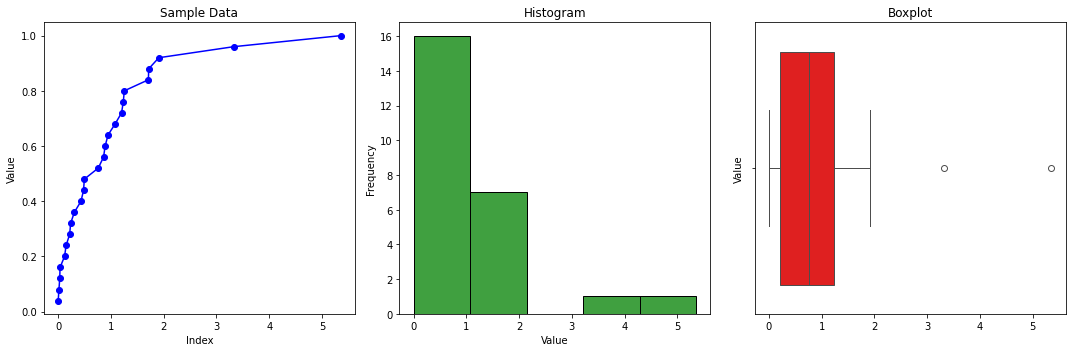

In [4]:
import seaborn as sns
import statsmodels.api as sm

# Creating a figure with subplots for each plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the sample data
ecdf = sm.distributions.ECDF(sample)
x = np.sort(sample)
y = ecdf(x)
axs[0].plot(x, y, marker='o', linestyle='-', color='b')
axs[0].set_title('Sample Data')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Histogram of the sample
sns.histplot(sample, bins=5, kde=False, color='g', ax=axs[1])
axs[1].set_title('Histogram')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

# Boxplot of the sample
sns.boxplot(x=sample, color='r', ax=axs[2], orient='h')
axs[2].set_title('Boxplot')
axs[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

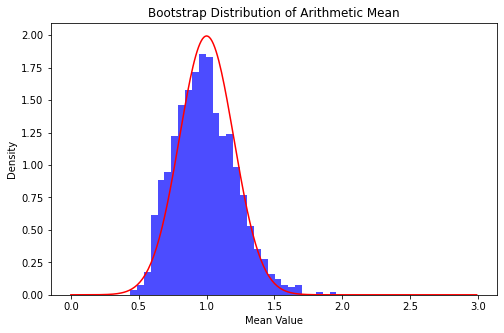

In [7]:
# Number of bootstrap resamples
num_resamples = 1000

# Bootstrap resampling and mean estimation
bootstrap_means = []
for _ in range(num_resamples):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_means.append(np.mean(resample))

# Plotting the distribution of means
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=30, density=True, color='b', alpha=0.7)
x = np.arange(0, 3, 0.01)
plt.plot(x, norm.pdf(x, 1, 1/5), color = "red")
plt.title('Bootstrap Distribution of Arithmetic Mean')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.show()

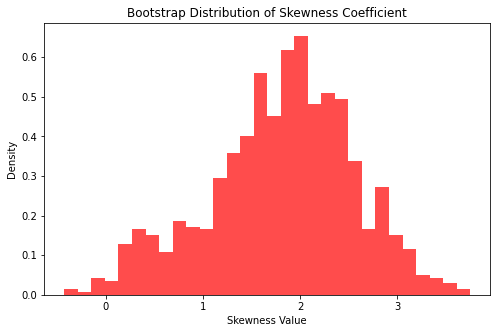

In [6]:
# Number of bootstrap resamples
num_resamples = 1000

# Bootstrap resampling and skewness estimation
bootstrap_skewness = []
for _ in range(num_resamples):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    skewness = stats.skew(resample)
    bootstrap_skewness.append(skewness)

# Plotting the distribution of skewness coefficients
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_skewness, bins=30, density=True, color='r', alpha=0.7)
plt.title('Bootstrap Distribution of Skewness Coefficient')
plt.xlabel('Skewness Value')
plt.ylabel('Density')
plt.show()

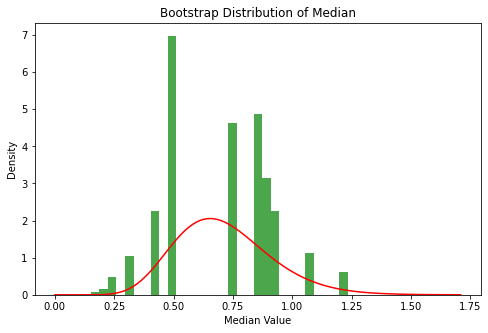

In [10]:
def x13(x):
  return 25 * 2704156 * np.exp(-13 * x) * (1 - np.exp(-x)) ** 12

# Number of bootstrap resamples
num_resamples = 1000

# Bootstrap resampling and median estimation
bootstrap_medians = []
for _ in range(num_resamples):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    median = np.median(resample)
    bootstrap_medians.append(median)

# Plotting the distribution of medians
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_medians, bins=30, density=True, color='g', alpha=0.7)

x_coord = np.linspace(0, sample[-1], 100)
y_coord = x13(x_coord)
plt.plot(x_coord, y_coord, color = "red")

plt.title('Bootstrap Distribution of Median')
plt.xlabel('Median Value')
plt.ylabel('Density')
plt.show()